In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn  import metrics
digits=load_digits()

In [15]:
print("Image data shapes ",digits.data.shape) # number of images and features  X
print("label data shape",digits.target.shape) # number of labels               Y
# .shape represents dimensions of data rows and columns.

Image data shapes  (1797, 64)
label data shape (1797,)


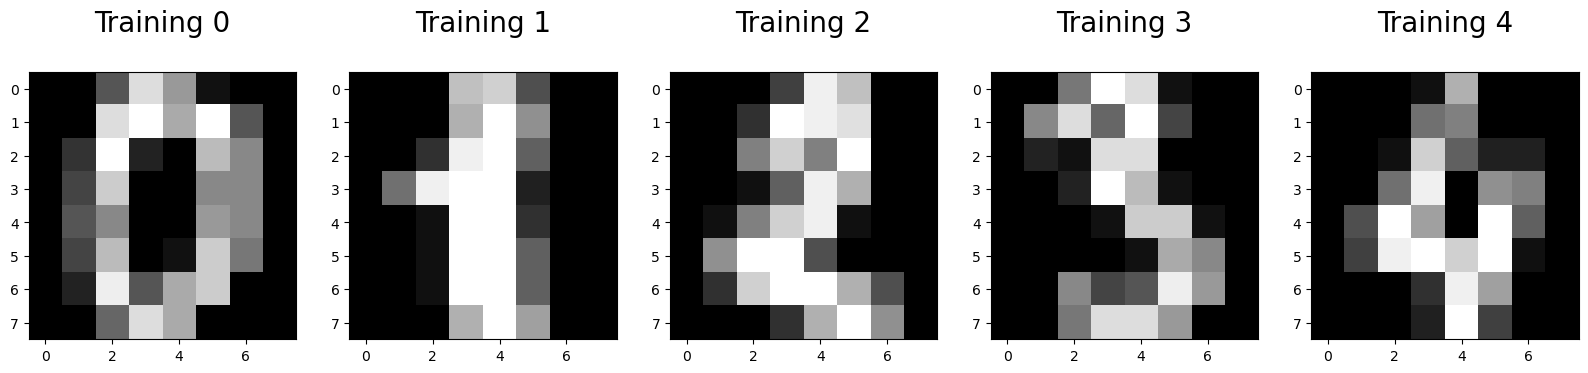

In [16]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training %i\n"%label,fontsize=20)
# The plt.figure() function creates a new figure with a width of 20 inches and a height of 4 inches.
# The for loop iterates over the first 5 elements of the digits.data and digits.target arrays.
# The plt.subplot() function creates a new subplot in the figure. The index+1 argument specifies the index of the subplot, starting from 1.
# The plt.imshow() function displays the image from the digits.data array in the current subplot. The cmap=plt.cm.gray argument specifies that the image should be displayed in grayscale.
# The plt.title() function adds a title to the current subplot. The "Training %i\n"%label string format specifier inserts the label from the digits.target array into the title.

In [24]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)
# x_train - independent variable digits.data (features)
# y_train - dependent variable digit.target (labels)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logi=LogisticRegression()
logi.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
print(logi.predict(x_test[0].reshape(1,-1)))

[4]


In [28]:
logi.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [30]:
logi.score(x_test,y_test)

0.9516908212560387

In [33]:
predictions=logi.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]], dtype=int64)

<AxesSubplot:>

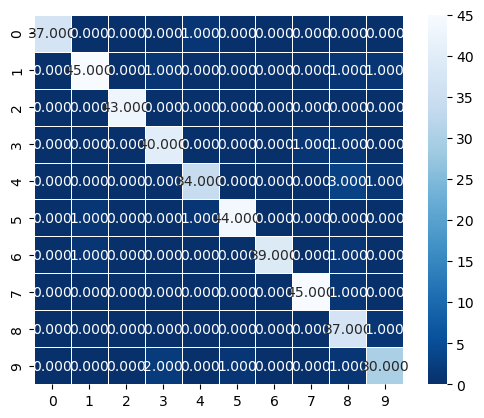

In [34]:
# heat map
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')